<a href="https://colab.research.google.com/github/BenGravell/rbot101/blob/main/probability_theory/distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Only need to run this once per Colab notebook
!git clone https://github.com/BenGravell/rbot101

Cloning into 'rbot101'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 69 (delta 35), reused 49 (delta 25), pack-reused 0
Unpacking objects: 100% (69/69), done.


In [2]:
import sys
sys.path.insert(0,'/content/rbot101')
sys.path.insert(0,'/content/rbot101/probability_theory')

In [4]:
# Plot all the distributions available in SciPy
# Based on https://stackoverflow.com/questions/37559470/what-do-all-the-distributions-available-in-scipy-stats-look-like

import numpy as np
from scipy import stats
import pandas as pd
from utility import savefig, plt_reset

In [5]:
plt_reset()
pd.options.display.max_columns = 6
np.random.seed(123)

num_samples = 10000
names, xlabels, frozen_rvs, samples = [], [], [], []

In [6]:
# Extract names and sane parameters of all scipy probability distributions
# (except the deprecated ones) and loop through them to create lists of names,
# frozen random variables, samples of random variates and x labels
show_names = ['norm',
              'alpha',
              'beta',
              'cauchy',
              'chi2',
              'cosine',
              'expon',
              'gamma',
              'laplace',
              'lognorm',
              'pareto',
              'rayleigh',
              'trapezoid',
              'triang',
              'uniform']
for name, params in stats._distr_params.distcont:
    if name in show_names:
        loc, scale = 0, 1

        names.append(name)
        params = list(params) + [loc, scale]

        # Create instance of random variable
        dist = getattr(stats, name)

        # Create frozen random variable using parameters and add it to the list
        # to be used to draw the probability density functions
        rv = dist(*params)
        frozen_rvs.append(rv)

        # Create sample of random variates
        samples.append(rv.rvs(size=num_samples))

        # Create x label containing the distribution parameters
        p_names = ['loc', 'scale']
        if dist.shapes:
            p_names = [sh.strip() for sh in dist.shapes.split(',')] + ['loc', 'scale']
        xlabels.append(', '.join([f'{pn}={pv:.2f}' for pn, pv in zip(p_names, params)]))

# Create pandas dataframe containing all the samples
df = pd.DataFrame(data=np.array(samples).T, columns=[name for name in names])
# Rename the duplicate column names by adding a period and an integer at the end
df.columns = pd.io.parsers.ParserBase({'names': df.columns})._maybe_dedup_names(df.columns)

# Set parameters for figure dimensions
nplot = df.columns.size
rows = 3
cols = int(np.ceil(nplot/rows))
subp_h = 10/rows
subp_w = 0.9*subp_h  # 10 corresponds to the figure width in inches

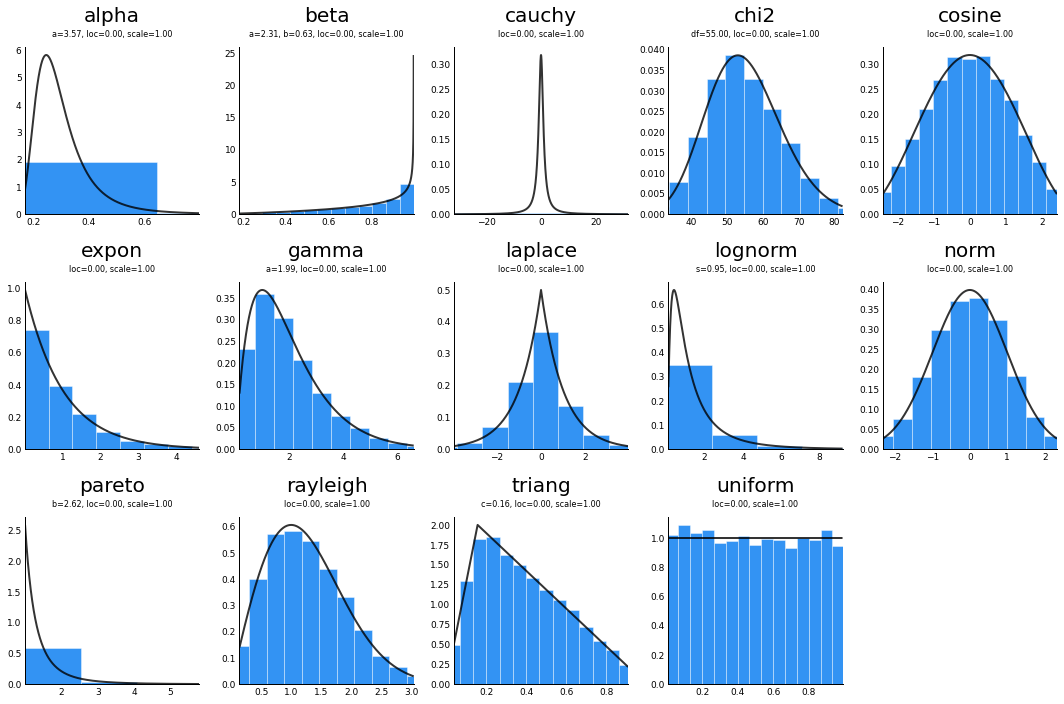

In [7]:
# Create pandas grid of histograms
axs = df.hist(density=True, bins=15, grid=False, edgecolor='w',
              linewidth=0.5, legend=False, alpha=0.8,
              layout=(rows, cols), figsize=(cols*subp_w, rows*subp_h))

# Loop over subplots to draw probability density function and apply some
# additional formatting
for idx, ax in enumerate(axs.flat[:df.columns.size]):
    rv = frozen_rvs[idx]
    x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 10000)
    ax.plot(x, rv.pdf(x), c='black', alpha=0.8)
    ax.set_title(ax.get_title(), pad=25)
    ax.set_xlim(x.min(), x.max())
    ax.set_xlabel(xlabels[idx], fontsize=8, labelpad=10)
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='both', labelsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax.figure.subplots_adjust(hspace=0.8, wspace=0.3)
ax.figure.tight_layout()
savefig('distributions.pdf')